### Задание 1.
###### Импортируйте библиотеки pandas, numpy и matplotlib. 
###### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
###### Создайте датафреймы X и y из этих данных.
###### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
###### Масштабируйте данные с помощью StandardScaler.
###### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
###### Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
target = boston.target

###### Создание датафреймов X и y

In [9]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

###### Разбиение датафреймов X и y на тренировочный и тестовый

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(404, 13)

In [12]:
X_test.shape

(102, 13)

###### Импортирование класса StandardScaler из sklearn.preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

###### Создание масштабированных датафреймов X_train_scaled и X_test_scaled при помощи класса StandardScaler().
###### В классе StandardScaler(), сокращенно scaler вызывается метод fit_transform(), который получает данные из датафрейма, 
###### преобразовывает их и возвращает преобразованный датафрейм

In [15]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [16]:
X_train_scaled.shape

(404, 13)

In [17]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_scaled.shape

(102, 13)

###### Импортирование класса TSNE() из sklearn.manifold
###### TSNE - стохастическое вложение соседей с распределением Стьюдента

In [18]:
from sklearn.manifold import TSNE

###### Создание класса TSNE с аргументами: n_components=2, learning_rate=250, random_state=42

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

###### Создание масссива X_train_tsne
###### Для датафрейма X_train применяется метод fit_transform для класса tsne.

In [20]:
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(404, 2)

###### Псотроение диаграммы рассеяния для массива X_train_tsne
###### Разбиваем данные массива X_train_tsne по столбцам

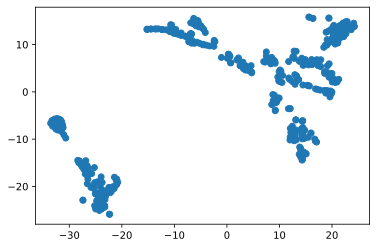

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2.
###### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
###### Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
###### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
###### Вычислите средние значения price и CRIM в разных кластерах.


###### Импортируем класс KMeans из sklearn.cluster

In [22]:
from sklearn.cluster import KMeans

###### Создание класса Kmeans с аргументами: n_clusters=3, max_iter=100, random_state=42

In [23]:
KMs = KMeans(n_clusters=3, max_iter=100, random_state=42)

###### Создание массива X_train_KMs при помощи масштабированного датафрема X_train_scaled и метода fit_predict()

In [24]:
X_train_KMs = KMs.fit_predict(X_train_scaled)

In [25]:
X_train_KMs

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

###### Построение диаграммы рассеяния на данных из TSNE и с цветами каждого кластера из X_train_KMs

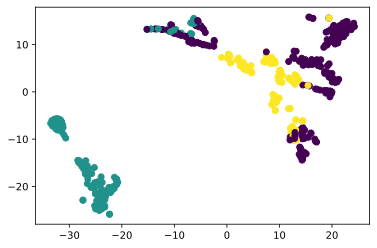

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_KMs)
plt.show()

###### Вычисление средних значений price в каждом кластере

In [27]:
print(y_train[X_train_KMs == 0].mean())
print(y_train[X_train_KMs == 1].mean())
print(y_train[X_train_KMs == 2].mean())

price    24.958115
dtype: float64
price    16.165354
dtype: float64
price    27.788372
dtype: float64


###### Вычисление средних значений CRIM в каждом кластере

In [28]:
print(X_train.CRIM[X_train_KMs == 0].mean())
print(X_train.CRIM[X_train_KMs == 1].mean())
print(X_train.CRIM[X_train_KMs == 2].mean())

0.42166020942408367
10.797028425196853
0.07356558139534886


###### Сопоставляя данные из price и CRIM по кластерам заметно влияние последнего на первый

### Задание 3.

###### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
###### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [29]:
X_test_KMs = KMs.fit_predict(X_test_scaled)
X_test_KMs

array([1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [30]:
print(y_test[X_test_KMs == 0].mean())
print(y_test[X_test_KMs == 1].mean())
print(y_test[X_test_KMs == 2].mean())

price    16.710526
dtype: float64
price    21.652
dtype: float64
price    33.871429
dtype: float64


In [31]:
print(X_test.CRIM[X_test_KMs == 0].mean())
print(X_test.CRIM[X_test_KMs == 1].mean())
print(X_test.CRIM[X_test_KMs == 2].mean())

9.419181842105264
0.2244212
0.08618571428571427
